In [30]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [31]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [32]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [33]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [34]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

C:\Users\diego\AppData\Local\Temp\ipykernel_12612\4196587217.py:4: SADeprecationWarning: The AutomapBase.prepare.reflect parameter is deprecated and will be removed in a future release.  Reflection is enabled when AutomapBase.prepare.autoload_with is passed.
  Base.prepare(engine, reflect=True)


In [22]:
# View all of the classes that automap found
table_names = Base.classes.keys()
print(table_names)

['measurement', 'station']


In [35]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [39]:
# Create our session (link) from Python to the DB
session = Session(bind=engine)

# Exploratory Precipitation Analysis

In [44]:
# Find the most recent date in the data set.
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23',)

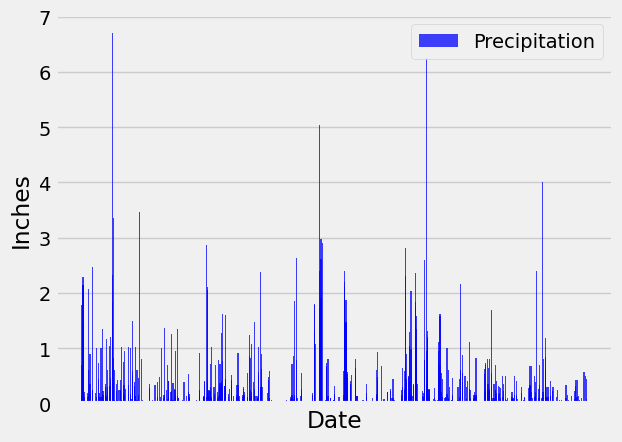

In [104]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
# Perform a query to retrieve the data and precipitation scores
Precipitation_data=session.query(Measurement.date,Measurement.prcp).\
    filter(Measurement.date >= '2016-08-23').\
    order_by(Measurement.date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
Precipitation_df=pd.DataFrame(Precipitation_data)
Precipitation_df = Precipitation_df.dropna()
Precipitation_df.rename(columns={'date': 'Date', 'prcp': 'Precipitation Scores'}, inplace=True)
# Sort the dataframe by date
Precipitation_df = Precipitation_df.sort_values(by='Date')
# Use Pandas Plotting with Matplotlib to plot the data
plt.xlabel("Date")
plt.ylabel("Inches")
plt.bar(Precipitation_df['Date'], Precipitation_df['Precipitation Scores'], facecolor="blue", alpha=0.75, align="center",label='Precipitation')
plt.legend()
plt.xticks([])
plt.show()

In [106]:
# Use Pandas to calculate the summary statistics for the precipitation data
summary_stats = Precipitation_df.describe()
summary_stats=summary_stats['Precipitation Scores']
summary_stats_df=pd.DataFrame(summary_stats)
summary_stats_df

,Precipitation Scores
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [110]:
# Design a query to calculate the total number of stations in the dataset
session.query(func.count(Station.id)).all()

[(9,)]

In [114]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [119]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').all()



[(54.0, 85.0, 71.66378066378067)]

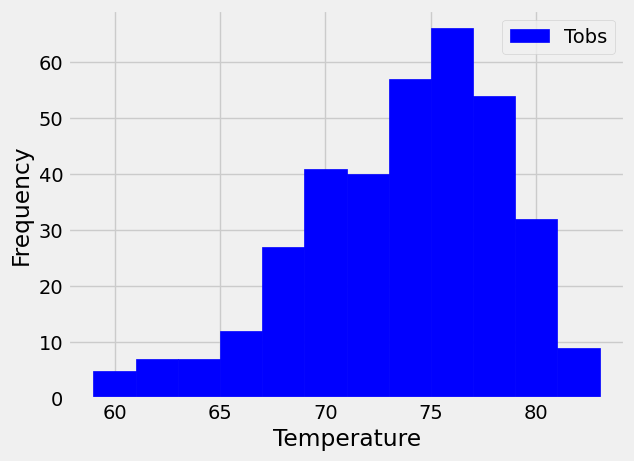

In [166]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
session.query(Measurement.date).order_by(Measurement.date.desc()).\
filter(Measurement.station == 'USC00519281').first()
#Result last result for USC00519281 station was on 2017-08-18

Temperature_data=session.query(func.count(Measurement.tobs),Measurement.tobs).\
    filter(Measurement.date >= '2016-08-18').\
    filter(Measurement.station == 'USC00519281').\
    group_by(Measurement.tobs).\
    order_by(func.count(Measurement.tobs)).all()

Temperature_df = pd.DataFrame(Temperature_data, columns=['Count', 'Temperature'])


Count = Temperature_df['Count']
Temperatures = Temperature_df['Temperature']
# Create a histogram
data = np.repeat(Temperatures, Count)

plt.hist(data, bins=12, color='blue', edgecolor='blue', label='Tobs')
plt.legend()
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()


# Close Session

In [171]:
# Close Session
session.close()